## Calculating the power dissipated in the circuit
The idea of this section is to show how we can use computers to help with calculations and output graphs of the results. These source code blocks can be copied to python scripts or alternatively this whole ipython workbook can be downloaded to allow you to run these calculations at home.

The equations used are ones that are mostly you meet in GCSE and just shows how much physics and insight you can gain from using them. The results of these calculations are graphs, where we have one independent/changeable variable - the element resistance, $R_{element}$. To make these graphs I am using ipython which is a programming language I like for calculations (these are the $\text{In [x]}$ boxes) - you can ignore this if you like and just focus on the graphs.

This problem follows on from the previous ideas and it's a good idea to read this gives us our physical understanding (see [here](http://nbviewer.ipython.org/github/joshualim/kettle_resistance/blob/master/resistancecalc.ipynb) and [here](http://nbviewer.ipython.org/github/joshualim/kettle_resistance/blob/master/resistancecalc_revisited.ipynb)) about what should the resistance be of a heating element? 

#### The calculation
We are aiming to plot the power output of the element (y-axis) as we change the element resistance (x-axis). Following the previous discussions, we will consider modelling this circuit:

<center> <img src="files/circuit2.png" /> </center>

We first calculate the resistance of the wire, assuming some lengths and material. 

In [2]:
from numpy import *

## Calculate the resistance of a typical wire, Rwire
Cu_resistivity=1.68*10**-8 ## in Ohm meters
L=1                        ## in m
diameter = 0.6               ## in mm
area = (0.001*diameter/2)**2 * pi    ## in m2
Rwire = Cu_resistivity * L / area ## in Ohms
print "Rwire = "
print Rwire

Rwire = 
0.059417845421


Now we have calculated $R_{wire}$ we can calculate the power using the equations for $P_{element}$, $P_{wire}$ and $P_{tot}$ defined. For this we will also need to use Ohms law to calculate the current in our circuit - here we will use the value of $R_{wire}$ above and we can let $R_{element}$ take any value between two limits (in this way we are able to simulate the same circuit with different $R_{element}$ values).

In [12]:
# set up problem
Vsupply=240# set the supply voltage
Relementmin=0.001; Relementmax=100; Relementincr=(Relementmax-Relementmin)/10000  ## let the element resistance to change from 0 to 1000 Ohms
Relement=arange(Relementmin,Relementmax,Relementincr)

# define a function that calculates the power for elements of different resistances
def powercalc(Vsupply,Rwire,Relement):
    
    I=Vsupply/(Rwire+Relement)  # calculate current through circuit using Ohms law
    PowerElement=I**2*Relement  # calc power dissipated in heating element
    PowerWire=I**2*Rwire        # calc power dissipated in the wires
    PowerTot=PowerElement+PowerWire
        
    return PowerElement, PowerWire, PowerTot

PowerElement, PowerWire, PowerTot = powercalc(Vsupply,Rwire,Relement)
    

We have calculated $P_{element}$, $P_{wire}$ and $P_{tot}$ and now it is interesting to plot them against our one adjustable parameter $R_{element}$.

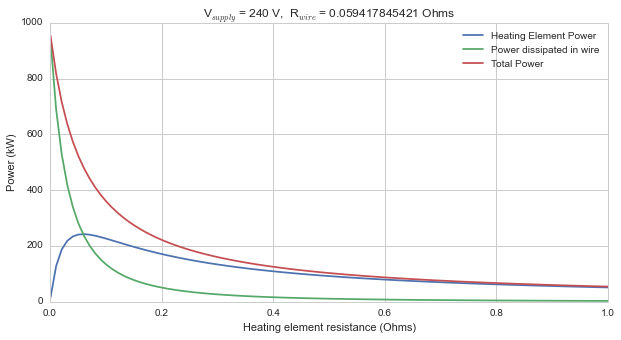

In [14]:
# make a graph of results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")

plt.figure(figsize=(10,5), dpi=100)
plt.plot(Relement,PowerElement/1000,label='Heating Element Power')  # divide by 1000 to get it into kW
plt.plot(Relement,PowerWire/1000,label='Power dissipated in wire')
plt.plot(Relement,PowerTot/1000,label='Total Power')

plt.xlabel('Heating element resistance (Ohms)'); plt.ylabel('Power (kW)')
plt.title(( 'V$_{supply}$ = '+str(Vsupply)+' V,  R$_{wire}$ = '+str(Rwire)+' Ohms' ))
plt.xlim(0,1)
plt.legend();plt.show()

OK! We have now calculated what we described in the "The answer: with no calculation section" in the previous blog. The curve in blue shows the power output from the heater. For large values of $R_{element}$ we see the power decreasing. This increases as you lower the resistance until we reach the point where the $R_{element} = R_{wire}$. After that, decreasing the $R_{element}$ doesn't increase in the current through the circuit much more because this is limited by the wire resistance, and so the power drops!

#### Calculating efficiency
The question in the back of our heads should is what is the best resistance value of the heating element to make the best possible heater? So far we have found the maximum heating power, but is this really the best? If we look at the power output of the wire, it is the same as the heating element at the maximum (because the two resistance are equal). This is not only quite inefficient but dangerous - the heating element should do most of the heating and not the wire providing electricity. Furthermore 300W of heater power for a small wire will melt it!

We can calculate the heating element efficiency by comparing the useful power ($P_{element}$) divided by the total power ($P_{tot}$) and now plot this below.

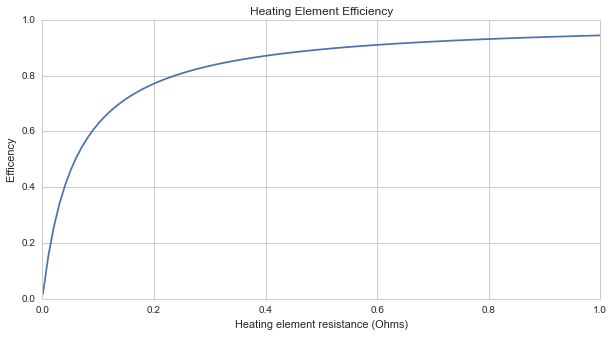

In [21]:
## calculate efficiency
efficiency= PowerElement/PowerTot  

plt.figure(figsize=(10,5), dpi=100)
plt.plot(Relement,efficiency)
plt.xlabel('Heating element resistance (Ohms)'); plt.ylabel('Efficency '); plt.title(( 'Heating Element Efficiency' ))
plt.xlim([0,1]); plt.ylim([0,1]);  plt.show()


Now we see how the heating element efficiency changes as we change the element resistance. We see that for the highest values of resistance we get the best efficiency. 

#### A real kettle
In a real kettle the heating element resistance is on the order 30 Ohms (I found this out by taking a kettle apart an measuring it!). Looking at the graph below we can see how much power this gives -> around 2kW. We also note that there is almost no power dissipated in the wires.

The power of the kettle I calculated also matches the advertised power rating - this is great news!

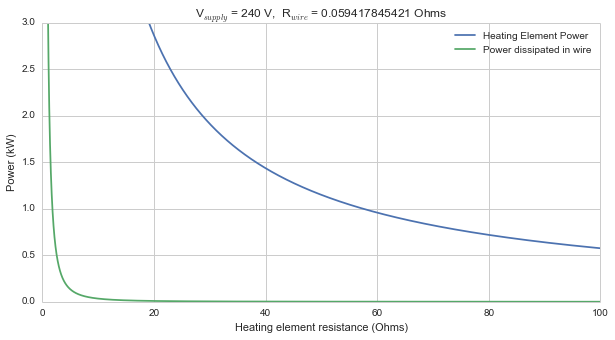

In [32]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(Relement,PowerElement/1000,label='Heating Element Power')  # divide by 1000 to get it into kW
plt.plot(Relement,PowerWire/1000,label='Power dissipated in wire')
#plt.plot(Relement,PowerTot/1000,label='Total Power')

plt.xlabel('Heating element resistance (Ohms)'); plt.ylabel('Power (kW)')
plt.title(( 'V$_{supply}$ = '+str(Vsupply)+' V,  R$_{wire}$ = '+str(Rwire)+' Ohms' ))
plt.xlim(0,100); plt.ylim(0,3)
plt.legend();plt.show()

#### Summary
What this notebook has tried to show is the how we can set up a problem and calculate the results. 

We have shown that:
* we should be sure of how we have set up our model - to get useful results for very low $R_{element}$ values, we have to include $R_{wire}$ (this was discussed lots [previously](http://nbviewer.ipython.org/github/joshualim/kettle_resistance/blob/master/resistancecalc_revisited.ipynb)).
* although a low resistance is important, if it is too low (lower that $R_{wire}$) then we don't get any more power out of the element (and heat the wires more instead).
* The value for maximum heating element power is when the $R_{element} = R_{wire}$. However, this is quite inefficient as we radiate as much power through the wires as the heater itself.
* We have been able to use model our kettle and with these calculation find the advertised power rating!